<a href="https://colab.research.google.com/github/ikrarmuhamad/Image-Detection/blob/main/101_Food_Vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Overview

In [ ]:
import zipfile
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [ ]:
!wget 'https://storage.googleapis.com/ztm_tf_course/food_vision/101_food_classes_10_percent.zip'

--2023-10-17 01:52:03--  https://storage.googleapis.com/ztm_tf_course/food_vision/101_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.126.207, 108.177.127.207, 74.125.128.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.126.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1625420029 (1.5G) [application/zip]
Saving to: ‘101_food_classes_10_percent.zip’

101_food_classes_10 100%[===================>]   1.51G  22.5MB/s    in 73s     

2023-10-17 01:53:16 (21.1 MB/s) - ‘101_food_classes_10_percent.zip’ saved [1625420029/1625420029]



In [ ]:
zip = zipfile.ZipFile('101_food_classes_10_percent.zip', 'r')
zip.extractall()
zip.close()

## Explore Data dir

In [ ]:
!ls 101_food_classes_10_percent

test  train


In [ ]:
!ls 101_food_classes_10_percent/train

apple_pie	    crab_cakes		     gyoza		    poutine
baby_back_ribs	    creme_brulee	     hamburger		    prime_rib
baklava		    croque_madame	     hot_and_sour_soup	    pulled_pork_sandwich
beef_carpaccio	    cup_cakes		     hot_dog		    ramen
beef_tartare	    deviled_eggs	     huevos_rancheros	    ravioli
beet_salad	    donuts		     hummus		    red_velvet_cake
beignets	    dumplings		     ice_cream		    risotto
bibimbap	    edamame		     lasagna		    samosa
bread_pudding	    eggs_benedict	     lobster_bisque	    sashimi
breakfast_burrito   escargots		     lobster_roll_sandwich  scallops
bruschetta	    falafel		     macaroni_and_cheese    seaweed_salad
caesar_salad	    filet_mignon	     macarons		    shrimp_and_grits
cannoli		    fish_and_chips	     miso_soup		    spaghetti_bolognese
caprese_salad	    foie_gras		     mussels		    spaghetti_carbonara
carrot_cake	    french_fries	     nachos		    spring_rolls
ceviche		    french_onion_soup	     omelette		    steak
cheesecake	    french_toas

In [ ]:
!ls '101_food_classes_10_percent/train/miso_soup'

1043862.jpg  1443662.jpg  1828425.jpg  234685.jpg   3200272.jpg  3642002.jpg  5540.jpg
1056044.jpg  1503489.jpg  1878913.jpg  2359769.jpg  3283629.jpg  3686415.jpg  569098.jpg
1080183.jpg  1601162.jpg  1960305.jpg  2393087.jpg  3293840.jpg  374943.jpg   730018.jpg
1117774.jpg  1607909.jpg  201196.jpg   256959.jpg   3313319.jpg  3758064.jpg  741449.jpg
1173620.jpg  1647697.jpg  2033734.jpg  2668300.jpg  3432751.jpg  3769844.jpg  749280.jpg
1225256.jpg  1728897.jpg  2047832.jpg  2757717.jpg  343304.jpg	 3784125.jpg  792099.jpg
1250981.jpg  1735286.jpg  2069699.jpg  2783841.jpg  3467189.jpg  388366.jpg   795546.jpg
1277319.jpg  1747120.jpg  2163637.jpg  2798419.jpg  3556423.jpg  423099.jpg   802425.jpg
1283756.jpg  1788989.jpg  2185588.jpg  2881825.jpg  3568054.jpg  44486.jpg    968758.jpg
133571.jpg   1819519.jpg  2236458.jpg  3097679.jpg  3595771.jpg  470688.jpg
13624.jpg    1824355.jpg  231574.jpg   3170522.jpg  3598196.jpg  543048.jpg


In [ ]:
train_dir = '101_food_classes_10_percent/train'
test_dir = '101_food_classes_10_percent/test'

In [ ]:
import os
for dirpath, dirname, filename in os.walk('101_food_classes_10_percent'):
  print(f"There are {len(dirname)} directory and {len(filename)} image in {dirpath}")

There are 2 directory and 0 image in 101_food_classes_10_percent
There are 101 directory and 0 image in 101_food_classes_10_percent/train
There are 0 directory and 75 image in 101_food_classes_10_percent/train/crab_cakes
There are 0 directory and 75 image in 101_food_classes_10_percent/train/falafel
There are 0 directory and 75 image in 101_food_classes_10_percent/train/scallops
There are 0 directory and 75 image in 101_food_classes_10_percent/train/fish_and_chips
There are 0 directory and 75 image in 101_food_classes_10_percent/train/beef_tartare
There are 0 directory and 75 image in 101_food_classes_10_percent/train/spaghetti_bolognese
There are 0 directory and 75 image in 101_food_classes_10_percent/train/paella
There are 0 directory and 75 image in 101_food_classes_10_percent/train/baby_back_ribs
There are 0 directory and 75 image in 101_food_classes_10_percent/train/shrimp_and_grits
There are 0 directory and 75 image in 101_food_classes_10_percent/train/garlic_bread
There are 0 di

In [ ]:
# Create class target
import pathlib
data_dir = pathlib.Path(train_dir)
target_class = [item.name for item in data_dir.glob('*')]
target_class

['crab_cakes',
 'falafel',
 'scallops',
 'fish_and_chips',
 'beef_tartare',
 'spaghetti_bolognese',
 'paella',
 'baby_back_ribs',
 'shrimp_and_grits',
 'garlic_bread',
 'caesar_salad',
 'edamame',
 'grilled_cheese_sandwich',
 'cheesecake',
 'creme_brulee',
 'macarons',
 'ramen',
 'steak',
 'beet_salad',
 'poutine',
 'prime_rib',
 'sashimi',
 'gnocchi',
 'pho',
 'tuna_tartare',
 'deviled_eggs',
 'hot_dog',
 'grilled_salmon',
 'lasagna',
 'sushi',
 'onion_rings',
 'croque_madame',
 'pad_thai',
 'tacos',
 'chicken_curry',
 'frozen_yogurt',
 'bread_pudding',
 'clam_chowder',
 'apple_pie',
 'cheese_plate',
 'tiramisu',
 'foie_gras',
 'bruschetta',
 'club_sandwich',
 'beef_carpaccio',
 'pulled_pork_sandwich',
 'pizza',
 'hummus',
 'pancakes',
 'fried_calamari',
 'eggs_benedict',
 'pork_chop',
 'greek_salad',
 'peking_duck',
 'cannoli',
 'samosa',
 'omelette',
 'takoyaki',
 'miso_soup',
 'nachos',
 'caprese_salad',
 'fried_rice',
 'spring_rolls',
 'french_toast',
 'lobster_bisque',
 'hot_and_

# Plot Random Image

In [ ]:
import random
def rand_img(target_folder, target_dir, filename):
  folder = target_folder + '/' + target_dir + '/' + filename
  rand = random.choice(os.listdir(folder))
  img = mpimg.imread(folder + '/' + rand)
  plt.imshow(img)
  plt.axis('off')
  plt.title(filename)

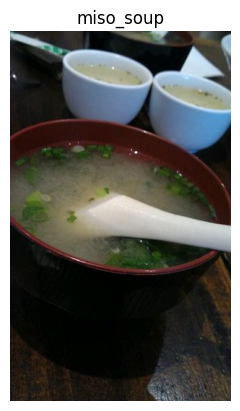

In [ ]:
rand_img('101_food_classes_10_percent', 'train', 'miso_soup')

# Preprocessing Data

In [ ]:
shape = (224, 224)
batch_size = 32
data_train = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                 label_mode = 'categorical',
                                                                 image_size = shape,
                                                                 batch_size = batch_size)
data_test = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                label_mode = 'categorical',
                                                                image_size = shape,
                                                                batch_size = batch_size,
                                                                shuffle = False)

Found 7575 files belonging to 101 classes.
Found 25250 files belonging to 101 classes.


# Create TensorBoard Callbacks before modelling

In [ ]:
def tensorboard_callbacks(folder_name, files):
  log_dir = folder_name + '/' + files
  tf_callbacks = tf.keras.callbacks.TensorBoard(
      log_dir = log_dir
  )
  return tf_callbacks

In [ ]:
path = 'checkpoint_weights/cekpoin.ckpt'
ckpt_callback = tf.keras.callbacks.ModelCheckpoint(path,
                                                   save_weights_only = True,
                                                   save_best_only = True,
                                                   save_freq = "epoch",
                                                   verbose = 1)

# Modelling

##EfficientNetV2B0

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

base_model = tf.keras.applications.EfficientNetV2B0(include_top = False)
base_model.trainable = False

input = layers.Input(shape = (224, 224, 3), name = 'input_layer')
data_aug = Sequential([
    layers.RandomFlip('horizontal'),
    layers.RandomZoom(0.2),
    layers.RandomRotation(0.2),
    layers.RandomHeight(0.2),
    layers.RandomWidth(0.2),
], name = 'augmented_data')
x = data_aug(input)
x = base_model(x, training = False)
x = layers.GlobalAveragePooling2D(name = 'globalaveragepool')(x)
output = layers.Dense(len(data_train.class_names), activation = 'softmax', name = 'output_layer')(x)
model_1 = tf.keras.Model(input, output)

In [ ]:
model_1.compile(loss = 'categorical_crossentropy',
                optimizer = 'Adam',
                metrics = ['accuracy'])

In [ ]:
model_1.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 augmented_data (Sequential  (None, None, None, 3)     0         
 )                                                               
                                                                 
 efficientnetv2-b0 (Functio  (None, None, None, 1280   5919312   
 nal)                        )                                   
                                                                 
 globalaveragepool (GlobalA  (None, 1280)              0         
 veragePooling2D)                                                
                                                                 
 output_layer (Dense)        (None, 101)               129381    
                                                           

In [ ]:
for i in model_1.layers[2].layers:
  print(i, i.trainable)

<keras.src.engine.input_layer.InputLayer object at 0x783f4223db40> False
<keras.src.layers.preprocessing.image_preprocessing.Rescaling object at 0x783f4c3ba1a0> False
<keras.src.layers.preprocessing.normalization.Normalization object at 0x783f363737c0> False
<keras.src.layers.convolutional.conv2d.Conv2D object at 0x783f367fa350> False
<keras.src.layers.normalization.batch_normalization.BatchNormalization object at 0x783f36373d30> False
<keras.src.layers.core.activation.Activation object at 0x783f363711b0> False
<keras.src.layers.convolutional.conv2d.Conv2D object at 0x783f4c1b2fb0> False
<keras.src.layers.normalization.batch_normalization.BatchNormalization object at 0x783f3648a800> False
<keras.src.layers.core.activation.Activation object at 0x783f4223d900> False
<keras.src.layers.convolutional.conv2d.Conv2D object at 0x783f36d71930> False
<keras.src.layers.normalization.batch_normalization.BatchNormalization object at 0x783f36373100> False
<keras.src.layers.core.activation.Activation

In [ ]:
history_1 = model_1.fit(data_train,
                        epochs = 5,
                        validation_data = data_test,
                        callbacks = [tensorboard_callbacks('Fine_tuning', 'EfficientNet'),
                                     ckpt_callback])

Epoch 1/5
237/237 [==============================] - ETA: 0s - loss: 3.5001 - accuracy: 0.2458
Epoch 1: val_loss did not improve from 2.02112
237/237 [==============================] - 128s 505ms/step - loss: 3.5001 - accuracy: 0.2458 - val_loss: 2.4504 - val_accuracy: 0.4401
Epoch 2/5
237/237 [==============================] - ETA: 0s - loss: 2.3729 - accuracy: 0.4653
Epoch 2: val_loss improved from 2.02112 to 1.97112, saving model to checkpoint_weights/cekpoin.ckpt
237/237 [==============================] - 109s 461ms/step - loss: 2.3729 - accuracy: 0.4653 - val_loss: 1.9711 - val_accuracy: 0.5112
Epoch 3/5
237/237 [==============================] - ETA: 0s - loss: 2.0175 - accuracy: 0.5241
Epoch 3: val_loss improved from 1.97112 to 1.77765, saving model to checkpoint_weights/cekpoin.ckpt
237/237 [==============================] - 100s 423ms/step - loss: 2.0175 - accuracy: 0.5241 - val_loss: 1.7777 - val_accuracy: 0.5433
Epoch 4/5
237/237 [==============================] - ETA: 0s - 

In [ ]:
import pandas as pd
def plot_metrics(history):
  df = pd.DataFrame(history.history)
  plt.plot(range(len(df)), df['loss'], label = 'loss')
  plt.plot(range(len(df)), df['val_loss'], label = 'val_loss')

  plt.figure()
  plt.plot(range(len(df)), df['accuracy'], label = 'accuracy')
  plt.plot(range(len(df)), df['val_accuracy'], label = 'val_accuracy')
  plt.legend()
  plt.xlabel('Epochs')

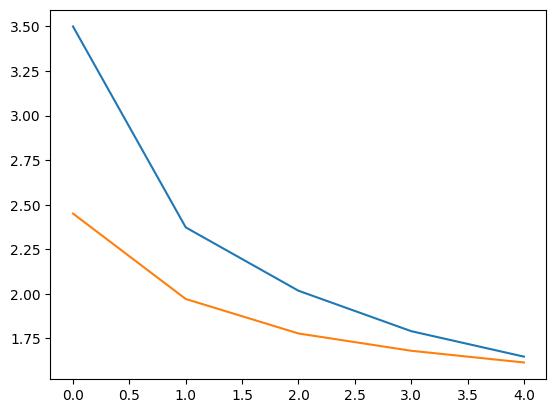

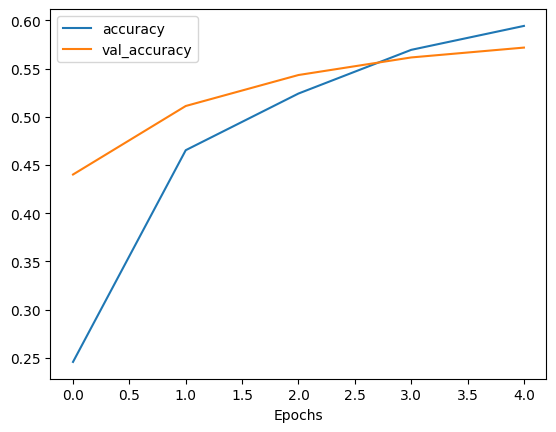

In [ ]:
plot_metrics(history_1)

In [ ]:
# Fine-Tune the model
for layer in base_model.layers[-10:]:
  layer.trainable = True

In [ ]:
for i in model_1.layers[2].layers:
  print(i, i.trainable)

<keras.src.engine.input_layer.InputLayer object at 0x783f4223db40> False
<keras.src.layers.preprocessing.image_preprocessing.Rescaling object at 0x783f4c3ba1a0> False
<keras.src.layers.preprocessing.normalization.Normalization object at 0x783f363737c0> False
<keras.src.layers.convolutional.conv2d.Conv2D object at 0x783f367fa350> False
<keras.src.layers.normalization.batch_normalization.BatchNormalization object at 0x783f36373d30> False
<keras.src.layers.core.activation.Activation object at 0x783f363711b0> False
<keras.src.layers.convolutional.conv2d.Conv2D object at 0x783f4c1b2fb0> False
<keras.src.layers.normalization.batch_normalization.BatchNormalization object at 0x783f3648a800> False
<keras.src.layers.core.activation.Activation object at 0x783f4223d900> False
<keras.src.layers.convolutional.conv2d.Conv2D object at 0x783f36d71930> False
<keras.src.layers.normalization.batch_normalization.BatchNormalization object at 0x783f36373100> False
<keras.src.layers.core.activation.Activation

In [ ]:
model_1.compile(loss = 'categorical_crossentropy',
                optimizer = tf.keras.optimizers.Adam(learning_rate = 1e-4),
                metrics = ['accuracy'])

In [ ]:
epochs = 10
history_1_tune = model_1.fit(data_train,
                             validation_data = data_test,
                             initial_epoch = history_1.epoch[-1],
                             epochs = epochs,
                             callbacks = [tensorboard_callbacks('Fine_tuning', 'EfficientNet')])

Epoch 5/10
237/237 [==============================] - 104s 404ms/step - loss: 1.4944 - accuracy: 0.6333 - val_loss: 1.5835 - val_accuracy: 0.5834
Epoch 6/10
237/237 [==============================] - 90s 379ms/step - loss: 1.4678 - accuracy: 0.6445 - val_loss: 1.5759 - val_accuracy: 0.5854
Epoch 7/10
237/237 [==============================] - 88s 372ms/step - loss: 1.4514 - accuracy: 0.6511 - val_loss: 1.5683 - val_accuracy: 0.5867
Epoch 8/10
237/237 [==============================] - 86s 364ms/step - loss: 1.4445 - accuracy: 0.6494 - val_loss: 1.5639 - val_accuracy: 0.5877
Epoch 9/10
237/237 [==============================] - 84s 355ms/step - loss: 1.4231 - accuracy: 0.6593 - val_loss: 1.5582 - val_accuracy: 0.5901
Epoch 10/10
237/237 [==============================] - 82s 346ms/step - loss: 1.4242 - accuracy: 0.6664 - val_loss: 1.5545 - val_accuracy: 0.5901


In [ ]:
def compare_plot(history_1, history_2):
  df_1 = pd.DataFrame(history_1.history)
  df_2 = pd.DataFrame(history_2.history)
  df = pd.concat([df_1, df_2])

  plt.figure(figsize = (12, 3))
  plt.plot(range(len(df)), df['loss'], label = 'loss')
  plt.plot(range(len(df)), df['val_loss'], label = 'val_loss')
  plt.plot([4, 4], plt.ylim(), label = 'start fine tuning')
  plt.legend()


  plt.figure()
  plt.figure(figsize = (12, 3))
  plt.plot(range(len(df)), df['accuracy'], label = 'accuracy')
  plt.plot(range(len(df)), df['val_accuracy'], label = 'val_accuracy')
  plt.plot([4, 4], plt.ylim(), label = 'start fine tuning')
  plt.xlabel('Epoch')
  plt.legend()

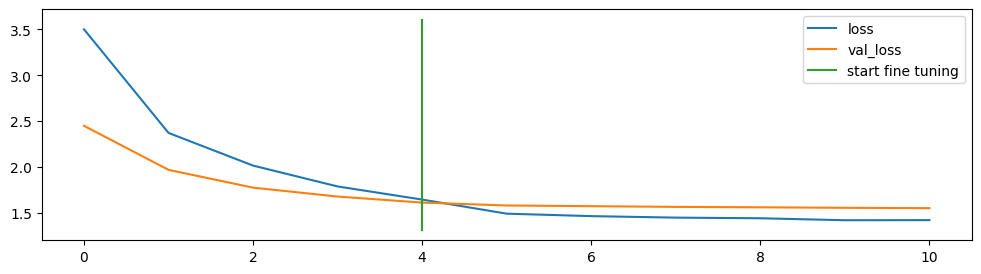

<Figure size 640x480 with 0 Axes>

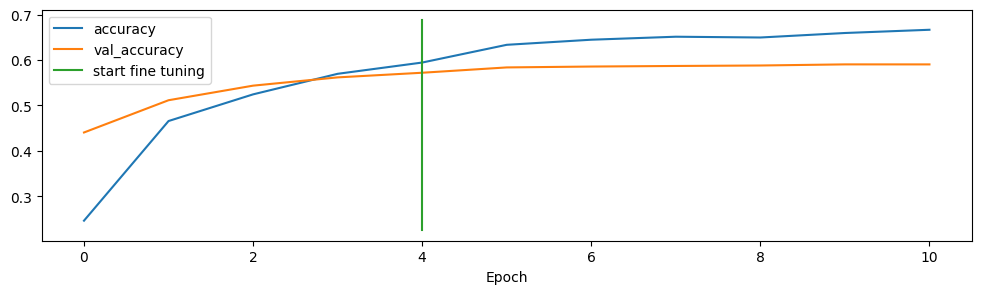

In [ ]:
compare_plot(history_1, history_1_tune)

In [ ]:
model_1.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 augmented_data (Sequential  (None, None, None, 3)     0         
 )                                                               
                                                                 
 efficientnetv2-b0 (Functio  (None, None, None, 1280   5919312   
 nal)                        )                                   
                                                                 
 globalaveragepool (GlobalA  (None, 1280)              0         
 veragePooling2D)                                                
                                                                 
 output_layer (Dense)        (None, 101)               129381    
                                                           

In [ ]:
for layer in model_1.layers[2].layers:
  print(layer, layer.trainable)

<keras.src.engine.input_layer.InputLayer object at 0x783f4223db40> False
<keras.src.layers.preprocessing.image_preprocessing.Rescaling object at 0x783f4c3ba1a0> False
<keras.src.layers.preprocessing.normalization.Normalization object at 0x783f363737c0> False
<keras.src.layers.convolutional.conv2d.Conv2D object at 0x783f367fa350> False
<keras.src.layers.normalization.batch_normalization.BatchNormalization object at 0x783f36373d30> False
<keras.src.layers.core.activation.Activation object at 0x783f363711b0> False
<keras.src.layers.convolutional.conv2d.Conv2D object at 0x783f4c1b2fb0> False
<keras.src.layers.normalization.batch_normalization.BatchNormalization object at 0x783f3648a800> False
<keras.src.layers.core.activation.Activation object at 0x783f4223d900> False
<keras.src.layers.convolutional.conv2d.Conv2D object at 0x783f36d71930> False
<keras.src.layers.normalization.batch_normalization.BatchNormalization object at 0x783f36373100> False
<keras.src.layers.core.activation.Activation

In [ ]:
def plot_pred(file, target_class, model):
  img = tf.io.read_file(file)
  img = tf.io.decode_image(img)
  img = tf.image.resize(img, size = [224, 224])
  pred_prob = model.predict(tf.expand_dims(img, axis = 0))
  pred_class = target_class[pred_prob.argmax()]
  plt.imshow(img/255)
  plt.axis('off')
  plt.title(f'Pred : {pred_class}, prob : {pred_prob.max() : .2f}')

In [ ]:
pred_probs = model_1.predict(data_test)

790/790 [==============================] - 82s 101ms/step


In [ ]:
pred_class = pred_probs.argmax(axis = 1)
pred_class[:10]

array([85,  0,  0,  0,  8, 78, 29, 46,  9, 41])

In [ ]:
y_label = []

for image, label in data_test.unbatch():
  y_label.append(label.numpy().argmax())

y_label[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_label, pred_class))

              precision    recall  f1-score   support

           0       0.40      0.22      0.29       250
           1       0.63      0.65      0.64       250
           2       0.68      0.47      0.56       250
           3       0.70      0.53      0.61       250
           4       0.52      0.39      0.44       250
           5       0.55      0.38      0.45       250
           6       0.78      0.77      0.77       250
           7       0.82      0.69      0.75       250
           8       0.32      0.52      0.39       250
           9       0.33      0.80      0.47       250
          10       0.51      0.48      0.49       250
          11       0.62      0.59      0.60       250
          12       0.74      0.58      0.65       250
          13       0.56      0.54      0.55       250
          14       0.45      0.60      0.52       250
          15       0.38      0.28      0.32       250
          16       0.66      0.53      0.59       250
          17       0.44    

In [ ]:
target_class[54]

'cannoli'

In [ ]:
!wget 'https://diethood.com/wp-content/uploads/2013/03/homemade-cannolis-2.jpg'

--2023-10-17 03:52:22--  https://diethood.com/wp-content/uploads/2013/03/homemade-cannolis-2.jpg
Resolving diethood.com (diethood.com)... 172.67.68.83, 104.26.7.7, 104.26.6.7
Connecting to diethood.com (diethood.com)|172.67.68.83|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 148454 (145K) [image/jpeg]
Saving to: ‘homemade-cannolis-2.jpg’

homemade-cannolis-2 100%[===================>] 144.97K  --.-KB/s    in 0.008s  

2023-10-17 03:52:22 (17.2 MB/s) - ‘homemade-cannolis-2.jpg’ saved [148454/148454]



1/1 [==============================] - 0s 88ms/step


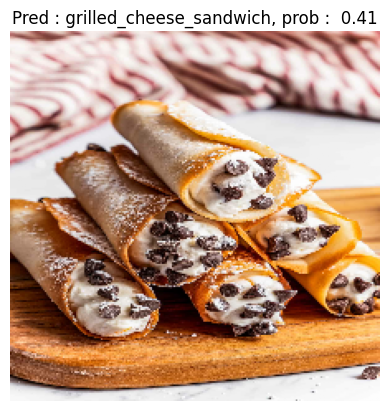

In [ ]:
plot_pred('homemade-cannolis-2.jpg', target_class, model_1)

In [ ]:
!wget 'https://asset.kompas.com/crops/6c-aUx_25WFLtaHKzphXBUD2LFs=/0x0:741x494/750x500/data/photo/2020/04/24/5ea2e8e0baa2d.jpeg'

--2023-10-17 03:22:10--  https://asset.kompas.com/crops/6c-aUx_25WFLtaHKzphXBUD2LFs=/0x0:741x494/750x500/data/photo/2020/04/24/5ea2e8e0baa2d.jpeg
Resolving asset.kompas.com (asset.kompas.com)... 18.239.50.9, 18.239.50.107, 18.239.50.83, ...
Connecting to asset.kompas.com (asset.kompas.com)|18.239.50.9|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 62326 (61K) [image/jpeg]
Saving to: ‘5ea2e8e0baa2d.jpeg’

5ea2e8e0baa2d.jpeg  100%[===================>]  60.87K  --.-KB/s    in 0.004s  

2023-10-17 03:22:10 (14.6 MB/s) - ‘5ea2e8e0baa2d.jpeg’ saved [62326/62326]



1/1 [==============================] - 0s 37ms/step


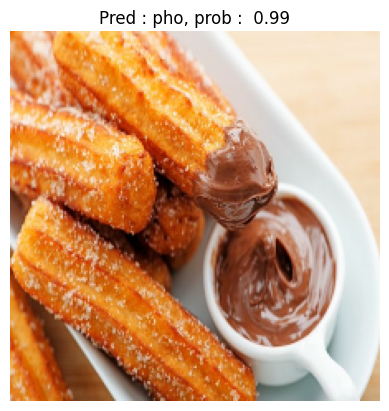

In [ ]:
plot_pred('5ea2e8e0baa2d.jpeg', target_class, model_1)

In [ ]:
!wget 'https://www.masakapahariini.com/wp-content/uploads/2022/07/tingkat-kematangan-steak-besar.jpg'

--2023-10-17 03:24:31--  https://www.masakapahariini.com/wp-content/uploads/2022/07/tingkat-kematangan-steak-besar.jpg
Resolving www.masakapahariini.com (www.masakapahariini.com)... 23.206.96.121
Connecting to www.masakapahariini.com (www.masakapahariini.com)|23.206.96.121|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 324305 (317K) [image/jpeg]
Saving to: ‘tingkat-kematangan-steak-besar.jpg’

tingkat-kematangan- 100%[===================>] 316.70K   815KB/s    in 0.4s    

2023-10-17 03:24:32 (815 KB/s) - ‘tingkat-kematangan-steak-besar.jpg’ saved [324305/324305]



1/1 [==============================] - 0s 27ms/step


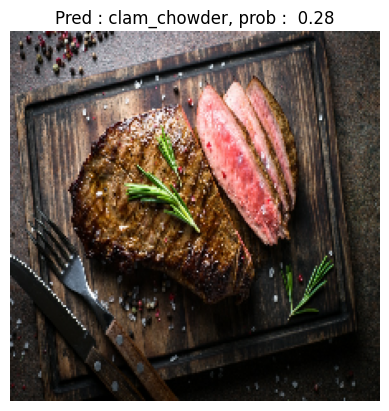

In [ ]:
plot_pred('tingkat-kematangan-steak-besar.jpg', target_class, model_1)

In [ ]:
!wget 'https://storage.googleapis.com/ztm_tf_course/food_vision/custom_food_images.zip'

--2023-10-17 03:30:13--  https://storage.googleapis.com/ztm_tf_course/food_vision/custom_food_images.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.31.207, 108.177.96.207, 108.177.119.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.31.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13192985 (13M) [application/zip]
Saving to: ‘custom_food_images.zip’

custom_food_images. 100%[===================>]  12.58M  13.8MB/s    in 0.9s    

2023-10-17 03:30:14 (13.8 MB/s) - ‘custom_food_images.zip’ saved [13192985/13192985]



In [ ]:
zip = zipfile.ZipFile('custom_food_images.zip', 'r')
zip.extractall()
zip.close()

1/1 [==============================] - 0s 91ms/step


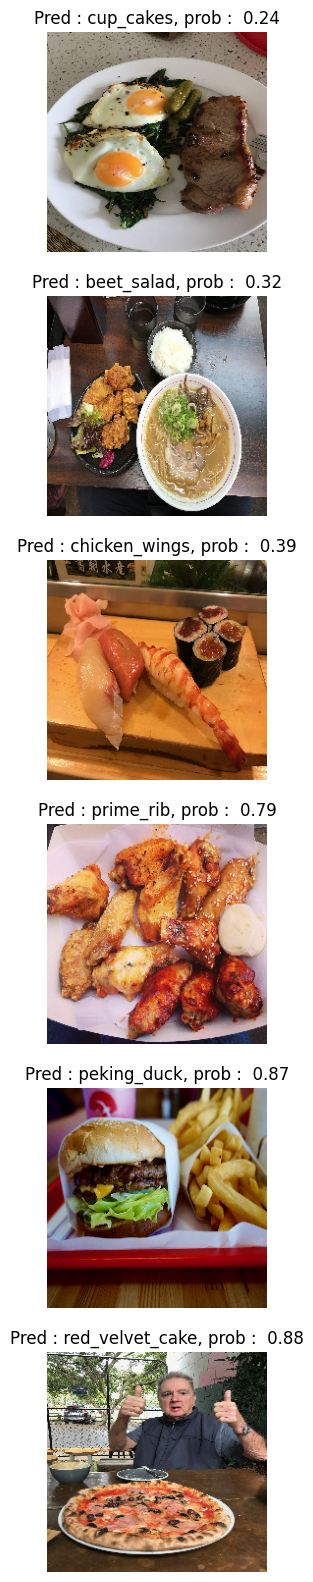

In [ ]:
plt.figure(figsize = (20, 20))
for i in range(len(os.listdir('custom_food_images'))):
  plt.subplot(6, 1, i+1)
  img = 'custom_food_images/' + os.listdir('custom_food_images')[i]
  plot_pred(img, target_class, model_1)

#*ResnetRS200*

In [ ]:
# Pre-trained model using functional API
from tensorflow import keras
from tensorflow.keras import layers

base_model = tf.keras.applications.ResNetRS200(include_top = False)
base_model.trainable = False

input = keras.Input(shape = (224, 224, 3), batch_size = 32, name = 'input_layer')
data_aug = keras.models.Sequential([
    layers.RandomFlip('horizontal'),
    layers.RandomZoom(0.2),
    layers.RandomWidth(0.2),
    layers.RandomHeight(0.2),
    layers.RandomRotation(0.2)
], name = 'augmentation')
x = data_aug(input)
x = base_model(x, training = False)
x = layers.GlobalAveragePooling2D(name = 'globalaveragepooling2D')(x)
output = layers.Dense(len(data_train.class_names), activation = 'softmax', name = 'output')(x)
model = tf.keras.Model(input, output)

model.compile(loss = 'categorical_crossentropy',
              optimizer = 'Adam',
              metrics = ['accuracy'])

history = model.fit(data_train,
                    epochs = 5,
                    validation_data = data_test,
                    validation_steps = int(0.15 * len(data_test)),
                    callbacks = [ckpt_callback])

367574712/367574712 [==============================] - 2s 0us/step
Epoch 1/5
237/237 [==============================] - ETA: 0s - loss: 3.1752 - accuracy: 0.2817
Epoch 1: val_loss improved from inf to 2.14293, saving model to checkpoint_weights/cekpoin.ckpt
237/237 [==============================] - 405s 2s/step - loss: 3.1752 - accuracy: 0.2817 - val_loss: 2.1429 - val_accuracy: 0.4820
Epoch 2/5
237/237 [==============================] - ETA: 0s - loss: 1.9855 - accuracy: 0.5030
Epoch 2: val_loss improved from 2.14293 to 1.68093, saving model to checkpoint_weights/cekpoin.ckpt
237/237 [==============================] - 328s 1s/step - loss: 1.9855 - accuracy: 0.5030 - val_loss: 1.6809 - val_accuracy: 0.5675
Epoch 3/5
237/237 [==============================] - ETA: 0s - loss: 1.6559 - accuracy: 0.5761
Epoch 3: val_loss improved from 1.68093 to 1.63865, saving model to checkpoint_weights/cekpoin.ckpt
237/237 [==============================] - 256s 1s/step - loss: 1.6559 - accuracy: 0.576

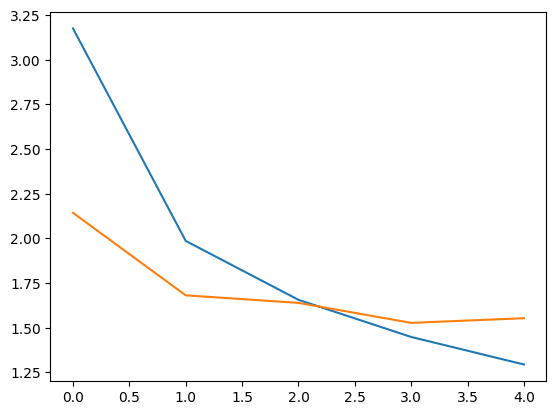

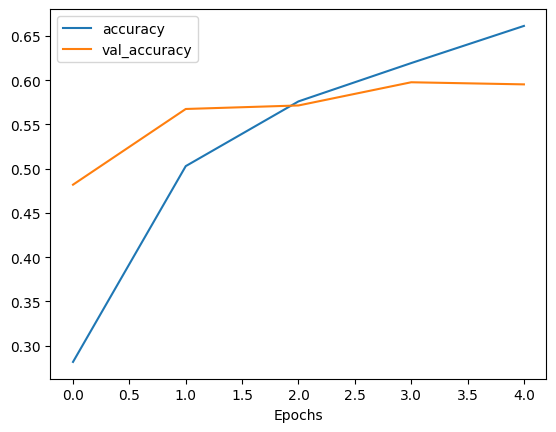

In [ ]:
plot_metrics(history)

In [ ]:
# Fine tune the model (Unfrezze the last 100 layers)
for layer in base_model.layers[-100:]:
  layer.trainable = True

In [ ]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = tf.keras.optimizers.Adam(1e-4),
              metrics = ['accuracy'])

In [ ]:
history.epoch

[0, 1, 2, 3, 4]

In [ ]:
epoch = 10
history_tune = model.fit(data_train,
                         epochs = 10,
                         initial_epoch = history.epoch[-1],
                         validation_data = data_test,
                         validation_steps = int(0.15 * len(data_test)))

Epoch 5/10
237/237 [==============================] - 236s 920ms/step - loss: 1.0562 - accuracy: 0.7358 - val_loss: 1.4517 - val_accuracy: 0.6234
Epoch 6/10
237/237 [==============================] - 198s 834ms/step - loss: 1.0424 - accuracy: 0.7409 - val_loss: 1.4618 - val_accuracy: 0.6205
Epoch 7/10
237/237 [==============================] - 195s 823ms/step - loss: 1.0120 - accuracy: 0.7523 - val_loss: 1.4596 - val_accuracy: 0.6184
Epoch 8/10
237/237 [==============================] - 175s 738ms/step - loss: 1.0087 - accuracy: 0.7494 - val_loss: 1.4669 - val_accuracy: 0.6208
Epoch 9/10
237/237 [==============================] - 182s 766ms/step - loss: 0.9995 - accuracy: 0.7517 - val_loss: 1.4404 - val_accuracy: 0.6250
Epoch 10/10
237/237 [==============================] - 172s 725ms/step - loss: 0.9875 - accuracy: 0.7608 - val_loss: 1.4489 - val_accuracy: 0.6213


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
model = tf.keras.models.load_model('/content/drive/MyDrive/Saved Model/model1.h5')

In [ ]:
before_tune = pd.DataFrame(history.history)

In [ ]:
after_tune = pd.DataFrame(history_tune.history)

In [ ]:
fine_tune = pd.concat([before_tune, after_tune]).reset_index()

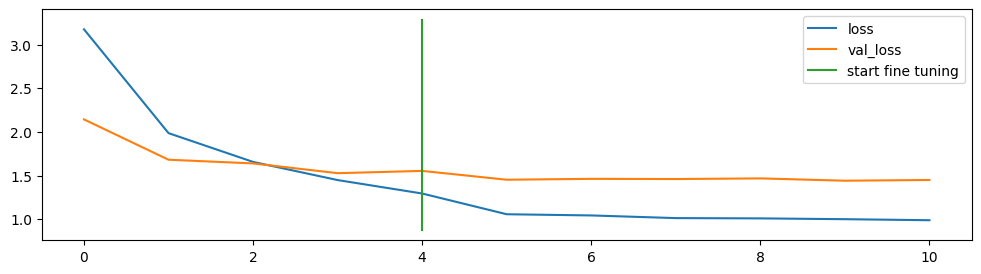

<Figure size 640x480 with 0 Axes>

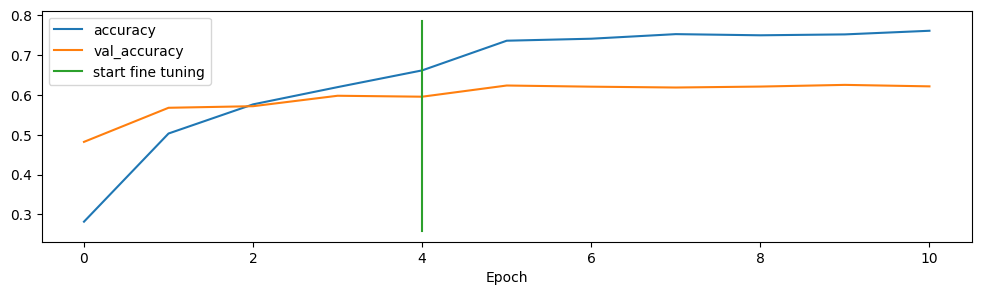

In [ ]:
plt.figure(figsize = (12, 3))
plt.plot(range(len(fine_tune)), fine_tune['loss'], label = 'loss')
plt.plot(range(len(fine_tune)), fine_tune['val_loss'], label = 'val_loss')
plt.plot([4, 4], plt.ylim(), label = 'start fine tuning')
plt.legend()


plt.figure()
plt.figure(figsize = (12, 3))
plt.plot(range(len(fine_tune)), fine_tune['accuracy'], label = 'accuracy')
plt.plot(range(len(fine_tune)), fine_tune['val_accuracy'], label = 'val_accuracy')
plt.plot([4, 4], plt.ylim(), label = 'start fine tuning')
plt.xlabel('Epoch')
plt.legend()

In [ ]:
model.save('model1.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
model.evaluate(data_test)

790/790 [==============================] - 291s 349ms/step - loss: 1.2838 - accuracy: 0.6520


[1.2838364839553833, 0.6519603729248047]

In [ ]:
pred_probs = model.predict(data_test)

790/790 [==============================] - 276s 342ms/step


In [ ]:
pred_class = pred_probs.argmax(axis = 1)

In [ ]:
y_label = []
for image, label in data_test.unbatch():
  y_label.append(label.numpy().argmax())

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, precision_score
print(accuracy_score(y_true = y_label,
                     y_pred = pred_class))

0.651960396039604


In [ ]:
print(classification_report(y_label, pred_class))

              precision    recall  f1-score   support

           0       0.37      0.32      0.35       250
           1       0.54      0.75      0.63       250
           2       0.61      0.62      0.61       250
           3       0.72      0.65      0.68       250
           4       0.68      0.51      0.58       250
           5       0.62      0.44      0.51       250
           6       0.82      0.73      0.77       250
           7       0.74      0.89      0.81       250
           8       0.37      0.53      0.44       250
           9       0.44      0.83      0.57       250
          10       0.66      0.50      0.57       250
          11       0.76      0.66      0.70       250
          12       0.80      0.66      0.72       250
          13       0.69      0.62      0.65       250
          14       0.64      0.64      0.64       250
          15       0.44      0.37      0.40       250
          16       0.81      0.56      0.66       250
          17       0.51    